# Regresion lineal Python

In [6]:
import pandas as pd
import numpy as np
data=pd.read_csv('../src/datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
import statsmodels.formula.api as smf

In [33]:
lm = smf.ols(formula= "Sales~TV", data= data).fit()
lm

In [12]:
lm.params
#Incercept es Alfa

Intercept    7.032594
TV           0.047537
dtype: float64

##  El modelo lineal predictivo 
### Se obtiene Alfa=7.03 Beta=0.04
* Sales= 7.032594 +0.047537*TV

In [13]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [14]:
# R^2
lm.rsquared

0.611875050850071

In [15]:
# R^2 Ajustado
lm.rsquared_adj

0.6099148238341623

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           1.47e-42
Time:                        10:27:11   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
sales_pred= lm.predict(pd.DataFrame(data['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

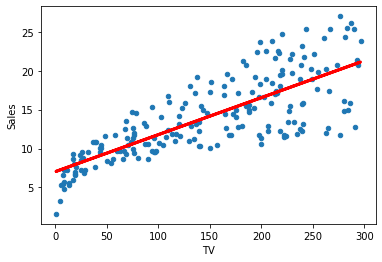

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(kind="scatter", x="TV", y='Sales')
plt.plot(pd.DataFrame(data['TV']), sales_pred , c='red', linewidth=3)

In [20]:
data['sales_pred']=7.032594+0.047537*data['TV']
data['RSE']=(data['Sales']-data['sales_pred'])**2
SSD=sum(data['RSE'])
#RSE desviacion tipica de lso residuos
RSE=np.sqrt(SSD/len(data-2))
SSD, RSE


(2102.5305838896525, 3.2423221492393783)

In [22]:
sales_m=np.mean(data['Sales'])
# ERROR PROMEDIO
r=RSE/sales_m
# Error promedio porcentaje que no queda correctamente explicado
r

0.23122283110995742

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

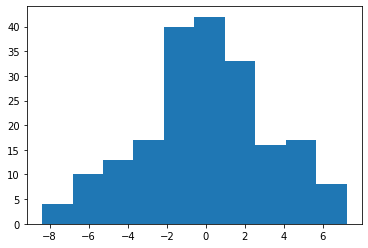

In [13]:
plt.hist((data['Sales']-data['sales_pred']))

# Regresion lineal multiple

* Sales~ TV
* Sales~ NewsPaper
* Sales~ Radio
* Sales~ TV+NewsPaper
* Sales~ TV+Radio
* Sales~ Newspaper+Radio
* Sales~ TV+Newspaper+Radio

In [14]:
lm2=smf.ols(formula="Sales~TV+Newspaper", data=data).fit()
lm2.params
#lm2.pvalues

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

*Intercept    5.774948
*TV           0.046901
*Newspaper    0.044219
# MODELO 2  que incluiya mas datos  Modelo de regresion lineal multiple
* Sales= 5.774948 +  0.046901 *TV + 0.044219* Newspaper

In [15]:
sales_pred=lm2.predict(data[['TV','Newspaper']])
SSD=data['RSE']=sum((data['Sales']-sales_pred)**2)
SSD
RSE=np.sqrt(SSD/len(data)-2-1)
RSE
error= RSE/sales_m
error

0.18310904613402468

In [25]:
lm3=smf.ols(formula="Sales~TV+Radio", data=data).fit()
lm3.params
#lm2.pvalues
lm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           4.83e-98
Time:                        10:52:28   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:

sales_pred=lm3.predict(data[['TV','Radio']])
SSD=sum((data['Sales']-sales_pred)**2)

RSE=np.sqrt(SSD/(len(data)-2-1))
RSE
error= RSE/sales_m
error

0.1199045043685506

In [26]:
lm4=smf.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()
lm4.params
#lm2.pvalues

lm4.summary()

sales_pred=lm4.predict(data[['TV','Radio', 'Newspaper']])
SSD=sum((data['Sales']-sales_pred)**2)

RSE=np.sqrt(SSD/(len(data)-2-1))
RSE
error= RSE/sales_m
error
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           1.58e-96
Time:                        10:57:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
RSE/sales_m

0.11989495351167677

,TV,Radio,Newspaper,Sales,sales_pred,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147990,1.567528
2,17.2,45.9,69.3,9.3,7.850230,2.101832
3,151.5,41.3,58.5,18.5,14.234450,18.194921
4,180.8,10.8,58.4,12.9,15.627284,7.438076


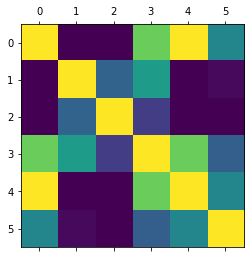

In [28]:
plt.matshow(data.corr())
data.head()


# Multicolinealidad
##### Permite determinar si las variables aportan información al Modelo o si de lo contrario se pueden quitar ya que no aportan nada

* VIF =~1: Variables no estan correlacionadas
* VIF <5: Variables tienen una correlacion moderada y sepuede quedar en el modelo (Aportan algo)
* VIF>5: Las Variables están altamente correlacionadas deben dejarlas totalmente dentro del modelo

\begin{equation*}
VIF =  \frac{1}{(1-R^2)}
\end{equation*}
* 

In [37]:

#Newspaper -TV+Radio -> R^2 VIF = 1 1/(1-R^2)
lm_n= smf.ols(formula= "Sales~TV+Radio", data= data).fit()
rsquare_n=lm_n.rsquared
VIF=1/(1-rsquare_n)
VIF

9.727083434576869

In [36]:
#Multicolinealidad
#TV -newsPaper+Radio -> R^2 VIF = 1 1/(1-R^2)
lm_n2= smf.ols(formula= "Sales~Newspaper+Radio", data= data).fit()
rsquare_n2=lm_n2.rsquared
VIF2=1/(1-rsquare_n2)
VIF2


1.4985879943139764

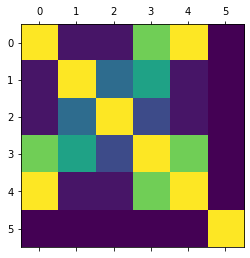

In [26]:
#Multicolinealidad
#Radio-Tv+Newspaper -> R^2 VIF = 1 1/(1-R^2)